Logistic Regression on Binary Classification Task

Sample Dataset

In [70]:
import pandas as pd

df = pd.read_csv(r"D:\Python Course\ScikitLearn\data\sms+spam+collection\SMSSpamCollection",
                 sep='\t',
                 header= None,
                 names=['label', 'sms'])
df.head()


,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [71]:
df["label"].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

Splitting Dataset

In [72]:
X = df["sms"]
y = df["label"]

Preprocessing Data

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
le.classes_

array(['ham', 'spam'], dtype=object)

Train Test Data

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=42)

TF-IDF

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfVec = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfVec.fit_transform(X_train)
X_test_tfidf = tfVec.transform(X_test) 

Train Model

In [76]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train_tfidf, y_train)

LogisticRegression()

Model Evaluate

In [79]:
yPred = logReg.predict(X_test_tfidf)
for pred, sms in zip(yPred[:5], X_test[:5]):
    print(f"Pred:{pred}\nTest:{sms}")

Pred:0
Test:Squeeeeeze!! This is christmas hug.. If u lik my frndshp den hug me back.. If u get 3 u r cute:) 6 u r luvd:* 9 u r so lucky;) None? People hate u:
Pred:0
Test:And also I've sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed
Pred:0
Test:Mmm thats better now i got a roast down me! id b better if i had a few drinks down me 2! Good indian?
Pred:0
Test:Mm have some kanji dont eat anything heavy ok
Pred:0
Test:So there's a ring that comes with the guys costumes. It's there so they can gift their future yowifes. Hint hint


In [80]:
from sklearn.metrics import classification_report
accReport = classification_report(y_test, yPred)
print(f"Predict Accuracy = {accReport}")

Predict Accuracy =               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1207
           1       1.00      0.76      0.86       186

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.97      1393



Confusion Matrix

In [83]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, yPred)
tn, fp, fn, tp = matrix.ravel()
print(f"TN: {tn}\nFP: {fp}\nFN: {fn}\nTP: {tp}")

TN: 1207
FP: 0
FN: 45
TP: 141


Text(0, 0.5, 'True Label')

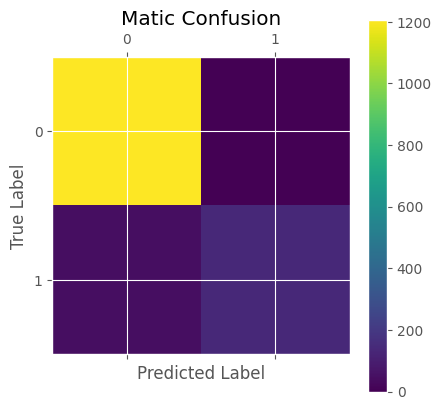

In [87]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.matshow(matrix)
plt.colorbar()
plt.title("Matic Confusion")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

(ROC) Reciever Operation Characteristic

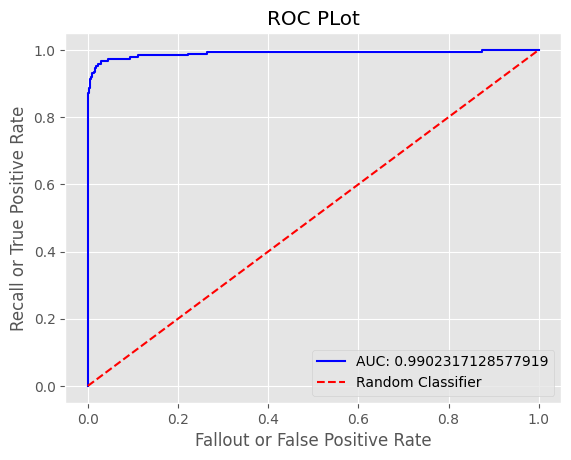

In [89]:
from sklearn.metrics import roc_curve, auc

prob_estimates = logReg.predict_proba(X_test_tfidf)

fpr, tpr, threshold = roc_curve(y_test, prob_estimates[:, 1])
auc_Val = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label=f"AUC: {auc_Val}") 
plt.plot([0, 1], [0, 1], 'r--', label="Random Classifier")

plt.title("ROC PLot")
plt.xlabel("Fallout or False Positive Rate")
plt.ylabel("Recall or True Positive Rate")
plt.legend()